In [1]:
import pandas as pd
import numpy as np
from matrixprofile import *
from matrixprofile.discords import discords
from matplotlib import pyplot as plt
import random
from scipy.io import arff

In [2]:
def plot_motifs(mtfs, labels, ax, data, window_size):
    #data can be raw data or MP
    colori = 0
    colors = 'rmb'
    for ms,l in zip(mtfs,labels):
        c =colors[colori % len(colors)]
        starts = list(ms)
        ends = [min(s + window_size,len(data)-1) for s in starts]
        ax.plot(starts, data[starts],  c +'o',  label=l+'(Motif)')
        ax.plot(ends, data[ends],  c +'o', markerfacecolor='none')
        for nn in ms:
            ax.plot(range(nn,nn+window_size),data[nn:nn+window_size], c , linewidth=2)
        colori += 1

    #ax.plot(a,'green', linewidth=1, label="data") COMMENTATO PERCHE PLOTTO I DATI INDIPENDENTEMENTE
    ax.legend()

In [3]:
def plot_discords(dis,ax,data,window_size):
    #data can be raw data or Mp
    color = 'k'
    for start in dis:
        end=start+window_size
        ax.plot(start, data[start],  color ,label='Discord')
        ax.plot(end, data[end],  color , markerfacecolor='none')
        
        ax.plot(range(start,start+window_size),data[start:start+window_size], color , linewidth=2)
        
    ax.legend(loc=1, prop={'size':12})    

In [4]:
def plot_all(Ts, mp, mot, motif_dist, dis, window_size):
    #genera e compara TS con MP, motifs e discords ottenuti 
    
    
    #Append np.nan to Matrix profile to enable plotting against raw data (FILL DI 0 ALLA FINE PER RENDERE LE LUNGHEZZE UGUALI )
    mp_adj = np.append(mp,np.zeros(window_size-1)+np.nan)

    #MODO 2 PER PLOTTARE (O-ORIENTED)
    #Plot dei dati
    fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,15))
    ax1.plot(np.arange(len(Ts)),Ts, label="Ts", color='g') #stampo linespace su x e valori data su y (USATO SE NON STAMPO MOTIF/DIS)
    ax1.set_ylabel('Ts', size=22)
    plot_motifs(mot, [f"{md:.3f}" for md in motif_dist], ax1, Ts, window_size) #sk
    plot_discords(dis, ax1, Ts, window_size)

    
    
    #Plot della Matrix Profile
    ax2.plot(np.arange(len(mp_adj)),mp_adj,label="Matrix Profile", color='green')
    ax2.set_ylabel('Matrix Profile', size=22)
    plot_motifs(mot, [f"{md:.3f}" for md in motif_dist], ax2, mp_adj, window_size)
    plot_discords(dis, ax2, mp_adj, window_size)

    plt.show()

In [5]:
def retrieve_all(Ts): #fornita la Ts calcola e restituisce mp, motifs, motifs_distances e discords
    Ts=Ts[0:127] #rimuovo l'attributo "classe"

    dfMP = pd.DataFrame(Ts).astype(float) # genero Dframe per lavorarci su, DA CAPIRE PERCHE SERVE FLOAT
    mp, mpi = matrixProfile.stomp(dfMP[0].values,window_size) #OK STOMP

    #PREPARO TUPLA DA PASSARE ALLA FUN MOTIF (RICHIEDE TUPLA FATTA DA MP E MPI)
    tupla=mp,mpi

    mot, motif_dist  =motifs.motifs(dfMP[0].values,tupla,2)

    #CALCOLO MOTIFS
    print('Motifs starting position: '+str(mot)+ ' Motifs values (min distances): '+str(motif_dist))

    #CALCOLO DISCORDS
    dis= discords(mp,window_size,2)
    print('Discords starting position: '+str(dis))
    
    tupla=mp,mot,motif_dist,dis
    return tupla
    

In [10]:
#riceve la lista di coppie dei motifs per ogni record(Ts), e resittuisce lista di valori singoli

def candidateFilter(CandidateList): 
    l2=np.array([])
    for i in range (len(CandidateList['Motif'])): #per ogni entry (per ogni record)
        numMotif=len(CandidateList['Motif'].iloc[i])
        #print(numMotif)
        for j in range (numMotif): # per ogni lista di motif
            l1=CandidateList['Motif'].iloc[i] #prima lista
            l2=np.append(l2,l1[j][0]) #prendo primo valore di ogni lista 
    
        CandidateList['Motif'].iloc[i]=l2
        l2=np.array([]) #svuoto array
    
    return CandidateList

In [6]:
dataset = arff.loadarff('CBF/CBF_TRAIN.arff')
df = pd.DataFrame(dataset[0]) #30 record su matrice da 128 attributi + 'b': classe appartenenza  
df.describe()
df.info()
df.shape
#print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 129 entries, att1 to target
dtypes: float64(128), object(1)
memory usage: 30.4+ KB


(30, 129)

TS ID:0
TS CLASS:b'1'
Motifs starting position: [[9, 93], [26, 85]] Motifs values (min distances): [0.1519480753462262, 0.163772362333256]
Discords starting position: [61 27]
Motifs[[9, 93], [26, 85]]
Motifs Dist[0.1519480753462262, 0.163772362333256]
Discords[61 27]


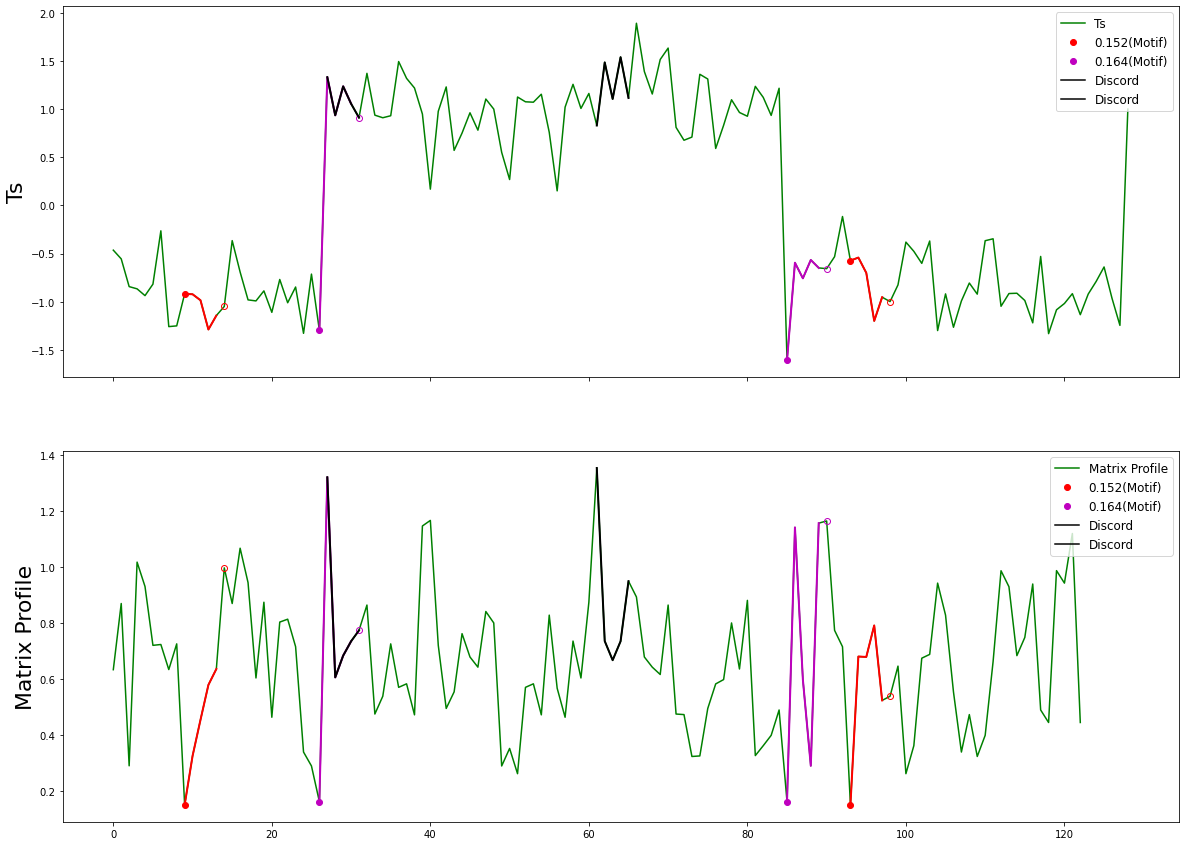

TS ID:1
TS CLASS:b'1'
Motifs starting position: [[105, 108], [54, 113]] Motifs values (min distances): [0.1627972975383437, 0.17485955806919326]
Discords starting position: [  8 119]
Motifs[[105, 108], [54, 113]]
Motifs Dist[0.1627972975383437, 0.17485955806919326]
Discords[  8 119]


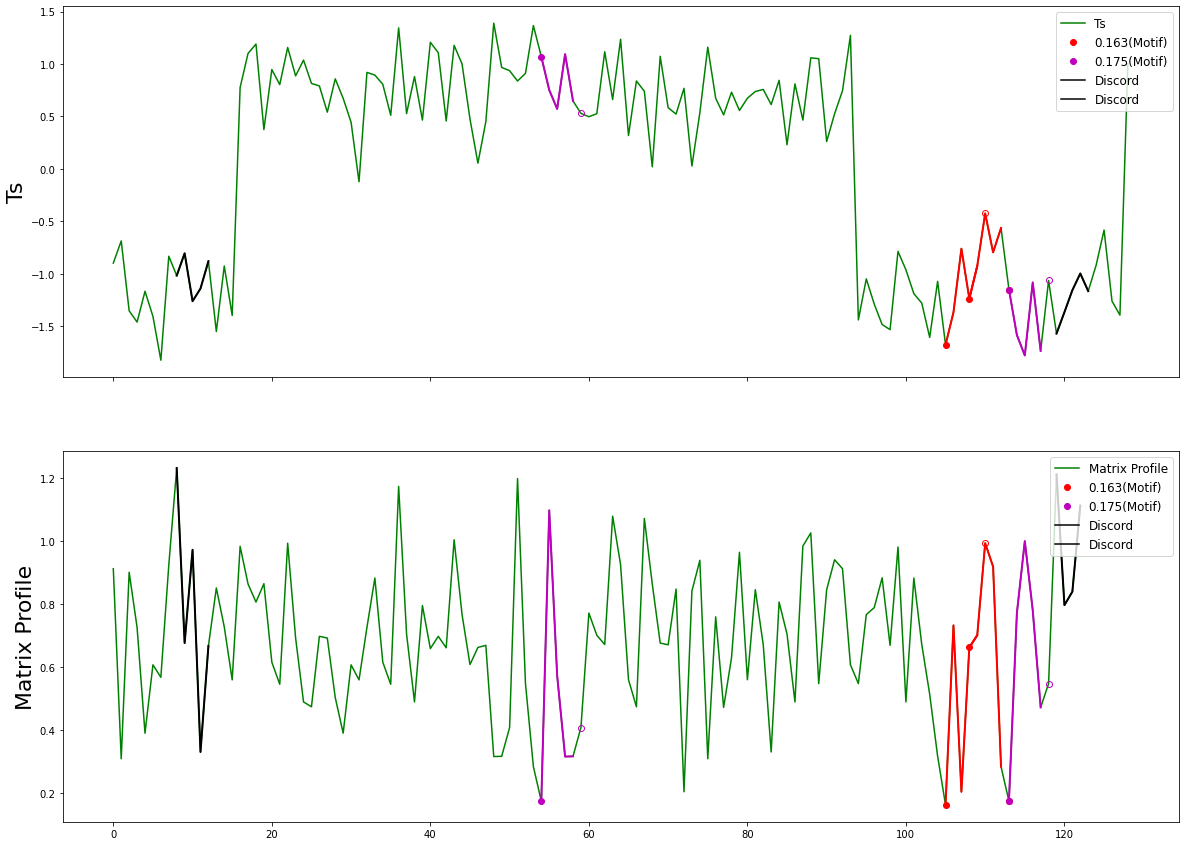

TS ID:2
TS CLASS:b'1'
Motifs starting position: [[17, 56], [40, 94]] Motifs values (min distances): [0.15961436265468118, 0.1916314415295471]
Discords starting position: [31  1]
Motifs[[17, 56], [40, 94]]
Motifs Dist[0.15961436265468118, 0.1916314415295471]
Discords[31  1]


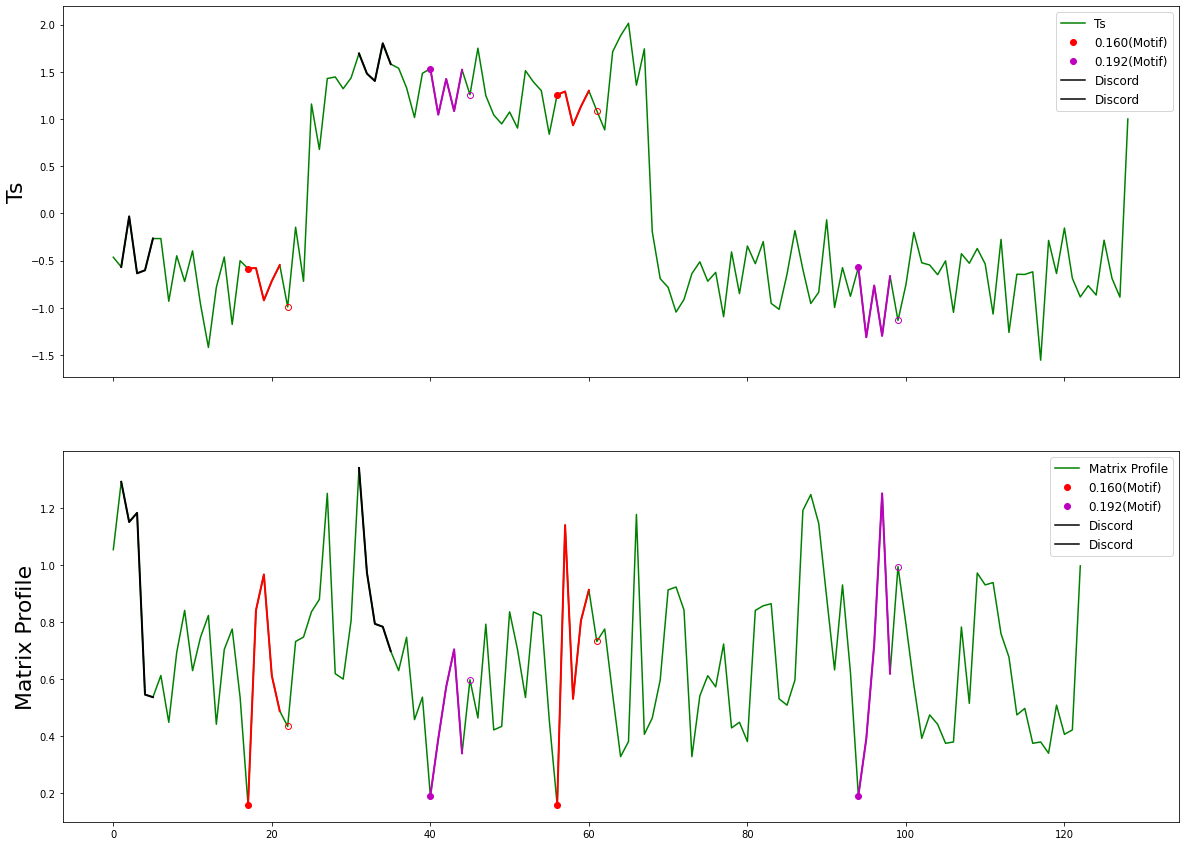

TS ID:3
TS CLASS:b'3'
Motifs starting position: [[48, 61], [12, 109, 115]] Motifs values (min distances): [0.0699947130701563, 0.16636811882837158]
Discords starting position: [23 86]
Motifs[[48, 61], [12, 109, 115]]
Motifs Dist[0.0699947130701563, 0.16636811882837158]
Discords[23 86]


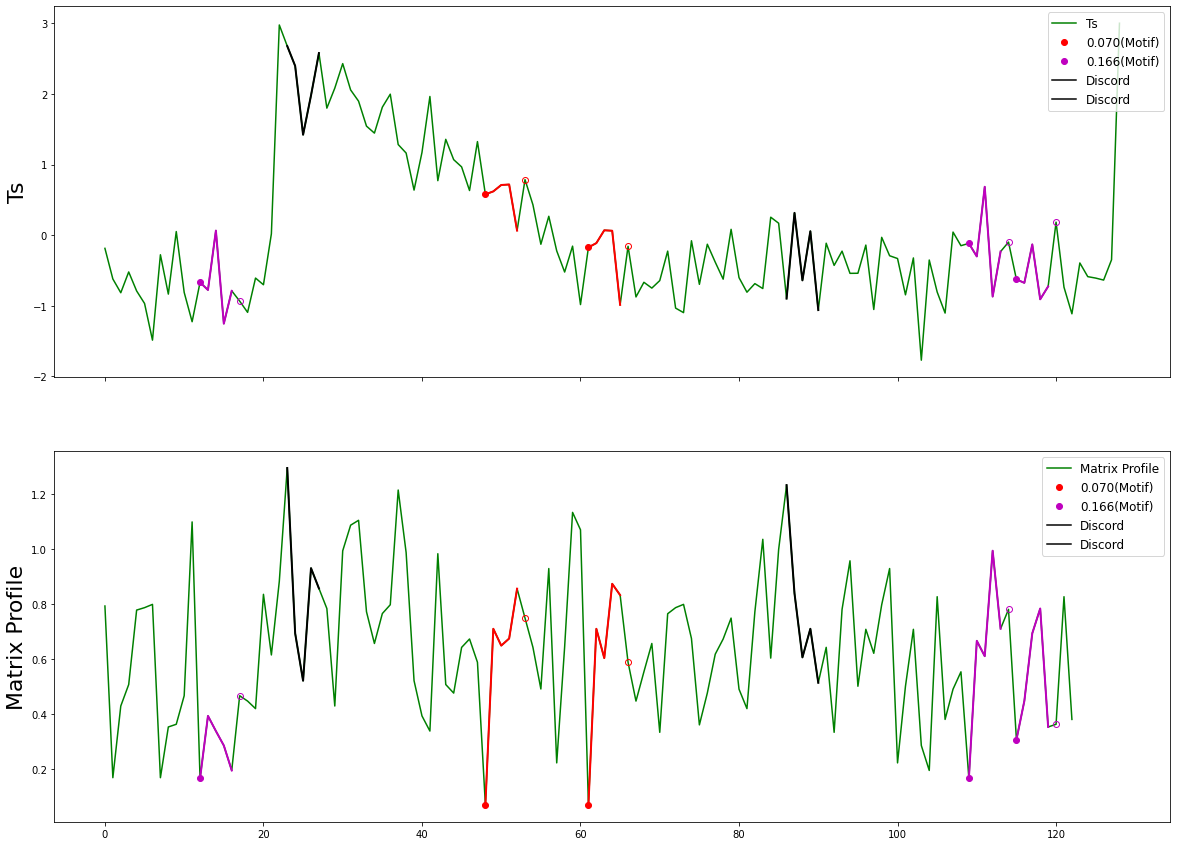

TS ID:4
TS CLASS:b'2'
Motifs starting position: [[27, 95]] Motifs values (min distances): [0.08781376526450137]
Discords starting position: [38 62]
Motifs[[27, 95]]
Motifs Dist[0.08781376526450137]
Discords[38 62]


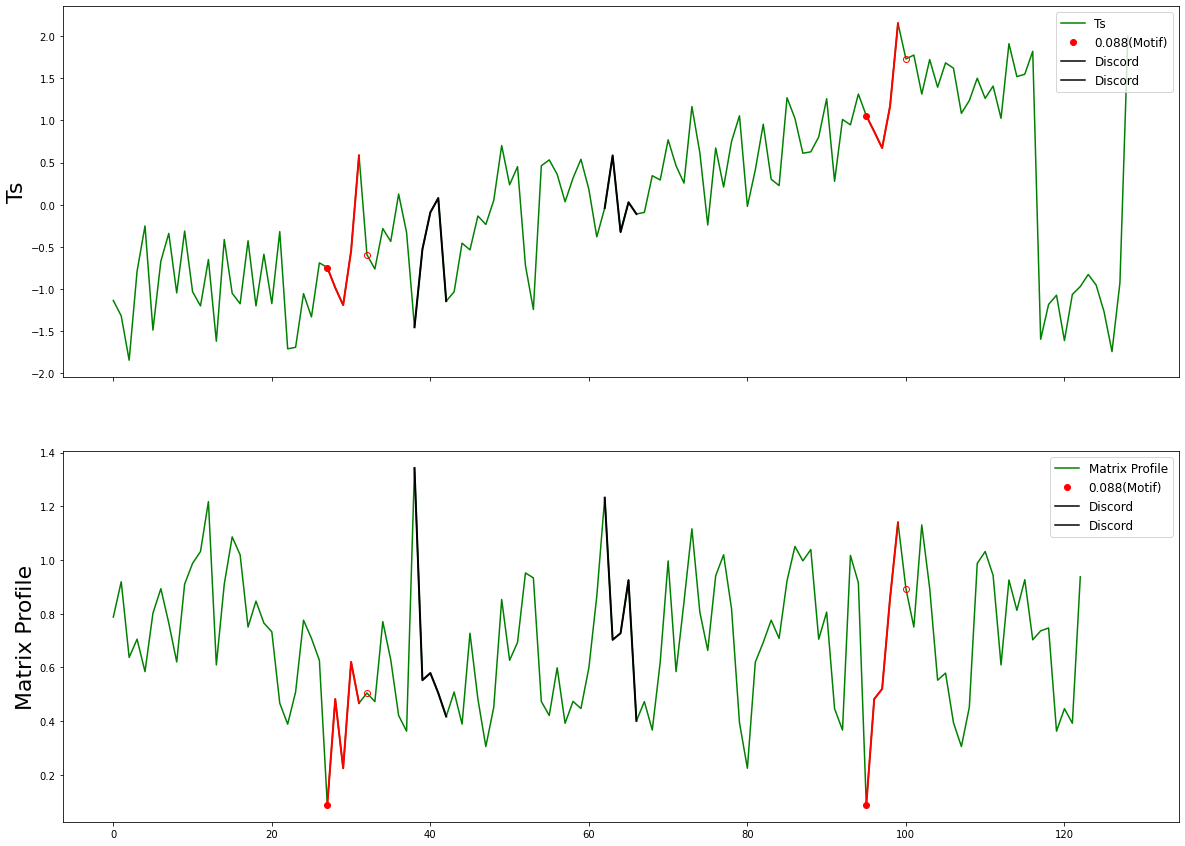

TS ID:5
TS CLASS:b'2'
Motifs starting position: [[45, 60], [13, 17, 122]] Motifs values (min distances): [0.2577302443251798, 0.27231498609807286]
Discords starting position: [119  26]
Motifs[[45, 60], [13, 17, 122]]
Motifs Dist[0.2577302443251798, 0.27231498609807286]
Discords[119  26]


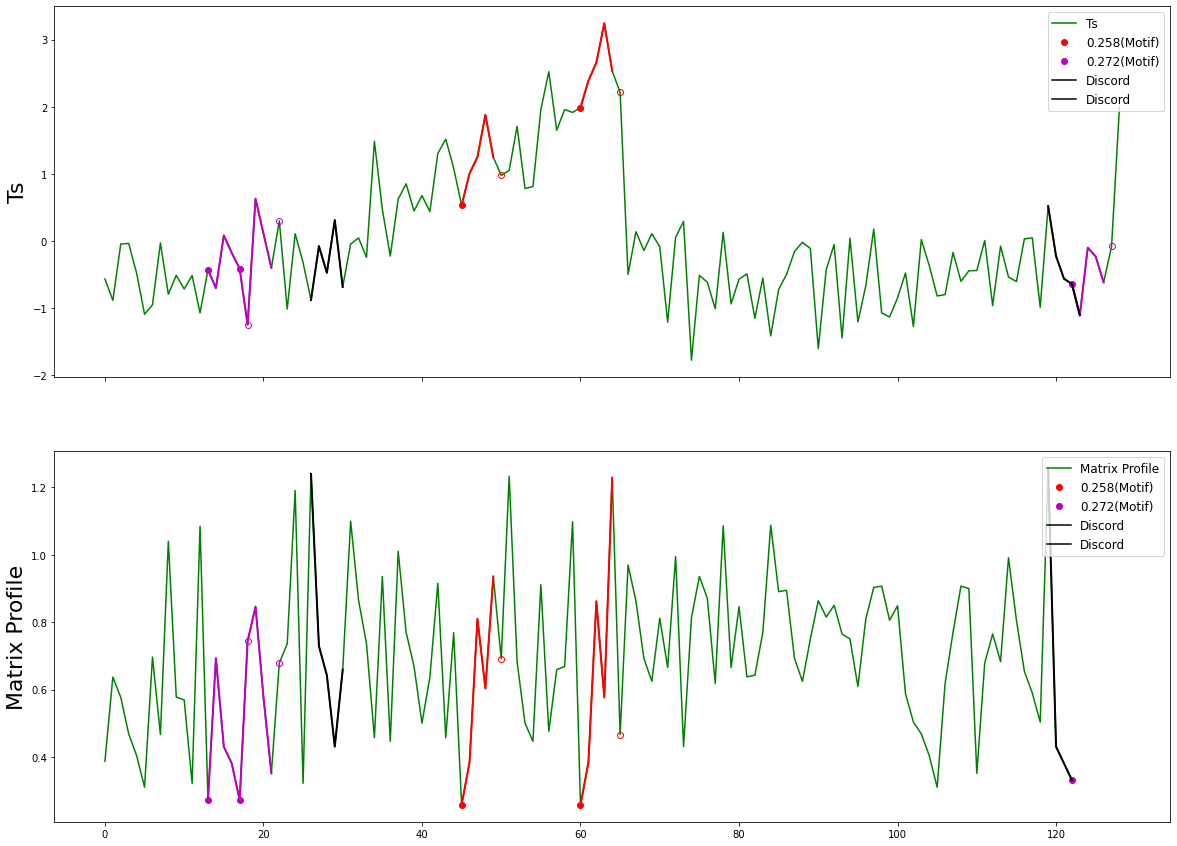

TS ID:6
TS CLASS:b'1'
Motifs starting position: [[7, 48], [37, 43]] Motifs values (min distances): [0.09480595199670205, 0.11024683176236907]
Discords starting position: [98 76]
Motifs[[7, 48], [37, 43]]
Motifs Dist[0.09480595199670205, 0.11024683176236907]
Discords[98 76]


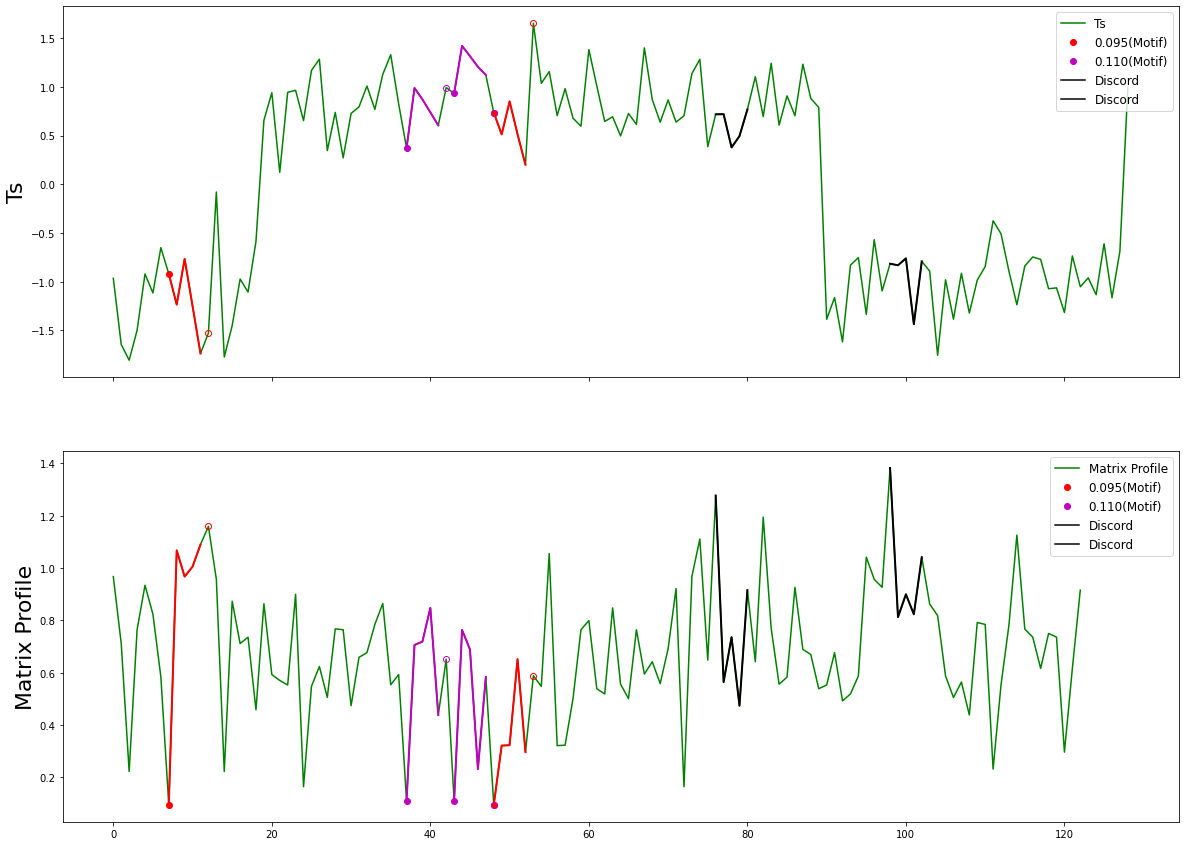

TS ID:7
TS CLASS:b'3'
Motifs starting position: [[2, 92], [24, 56]] Motifs values (min distances): [0.18574452697386612, 0.24652043650258973]
Discords starting position: [36  8]
Motifs[[2, 92], [24, 56]]
Motifs Dist[0.18574452697386612, 0.24652043650258973]
Discords[36  8]


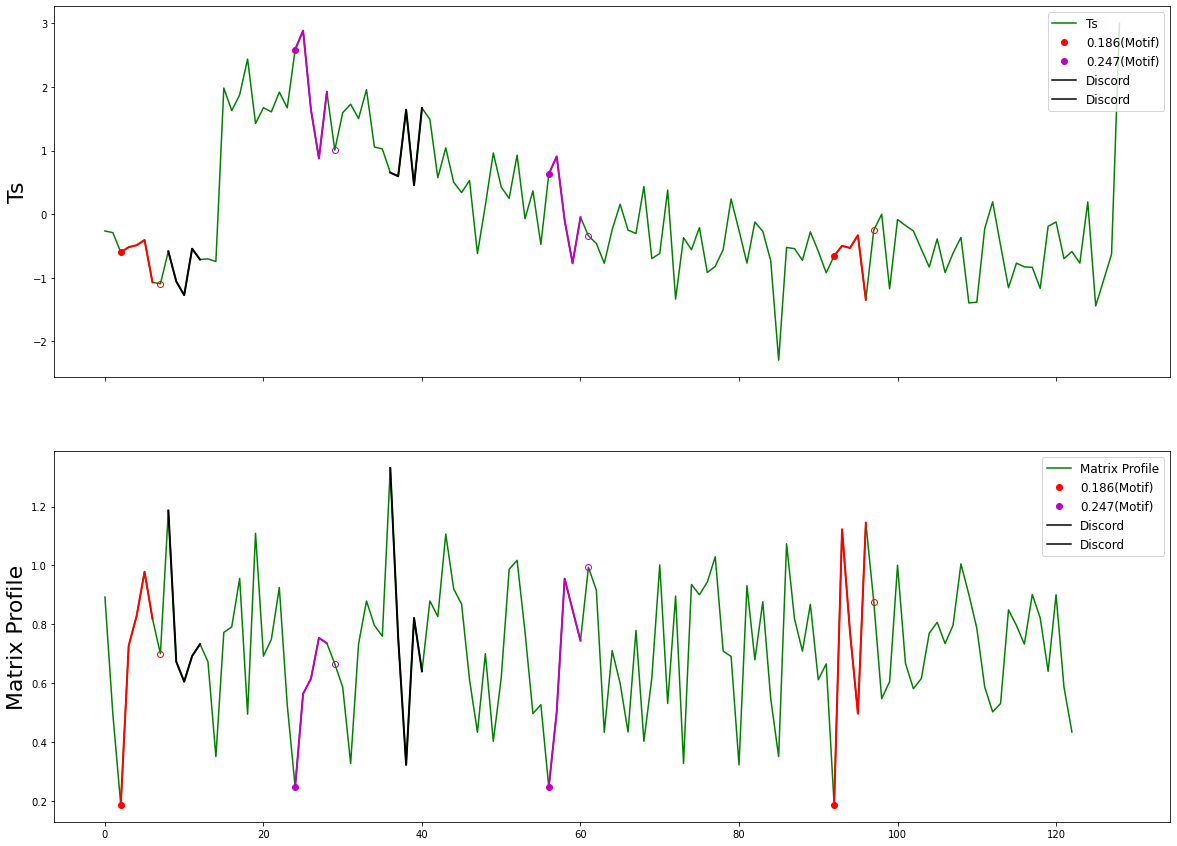

TS ID:8
TS CLASS:b'2'
Motifs starting position: [[1, 11], [29, 52]] Motifs values (min distances): [0.27670661553882797, 0.31442141776389537]
Discords starting position: [23 32]
Motifs[[1, 11], [29, 52]]
Motifs Dist[0.27670661553882797, 0.31442141776389537]
Discords[23 32]


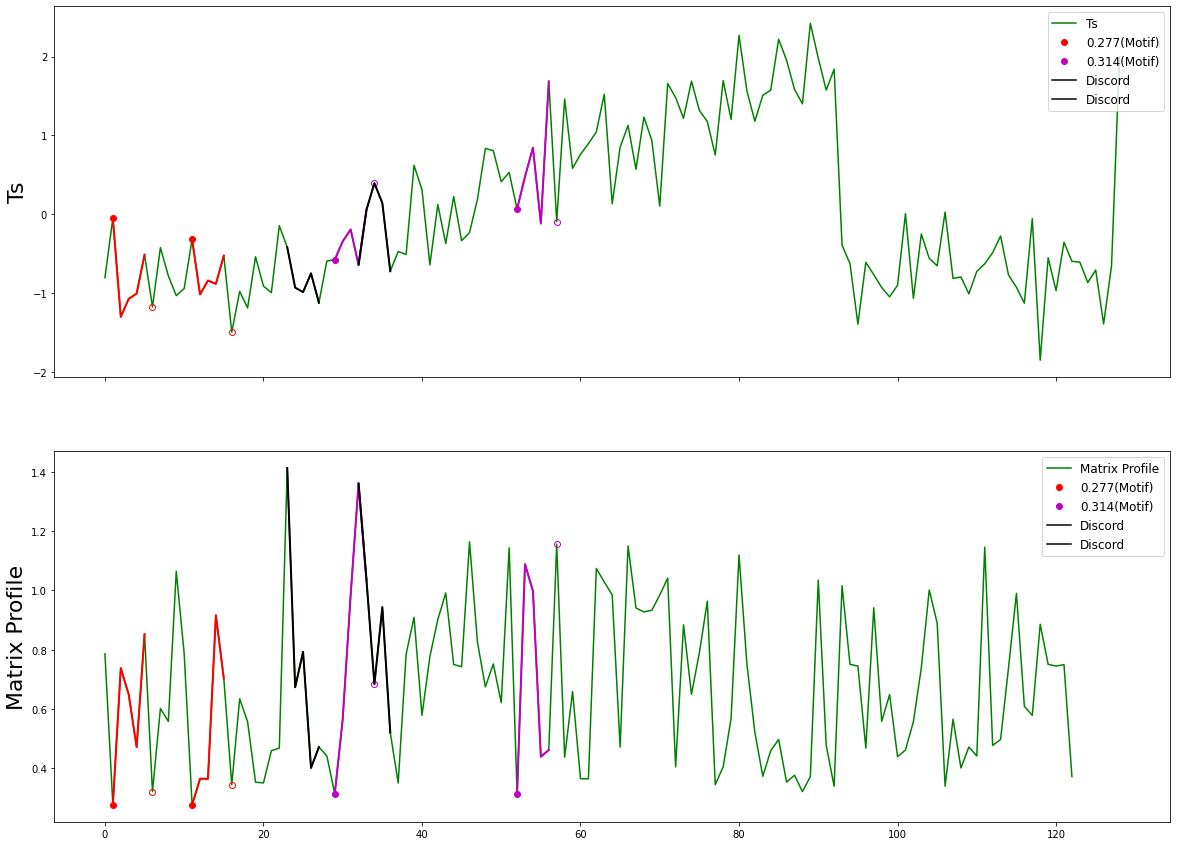

TS ID:9
TS CLASS:b'1'
Motifs starting position: [[50, 103], [0, 33]] Motifs values (min distances): [0.08655854694147459, 0.23058534566147112]
Discords starting position: [38 59]
Motifs[[50, 103], [0, 33]]
Motifs Dist[0.08655854694147459, 0.23058534566147112]
Discords[38 59]


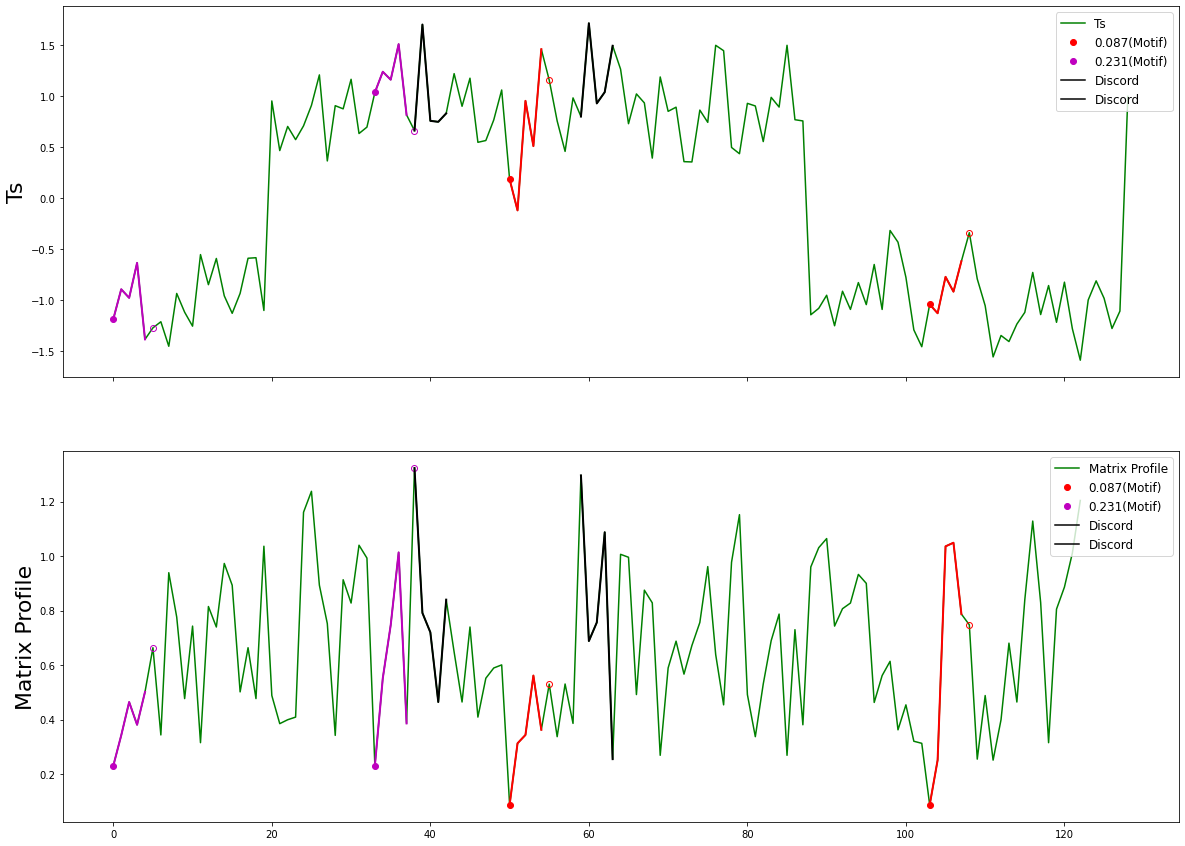

TS ID:10
TS CLASS:b'2'
Motifs starting position: [[11, 26], [17, 75]] Motifs values (min distances): [0.16609611055262594, 0.2890055978564533]
Discords starting position: [80 23]
Motifs[[11, 26], [17, 75]]
Motifs Dist[0.16609611055262594, 0.2890055978564533]
Discords[80 23]


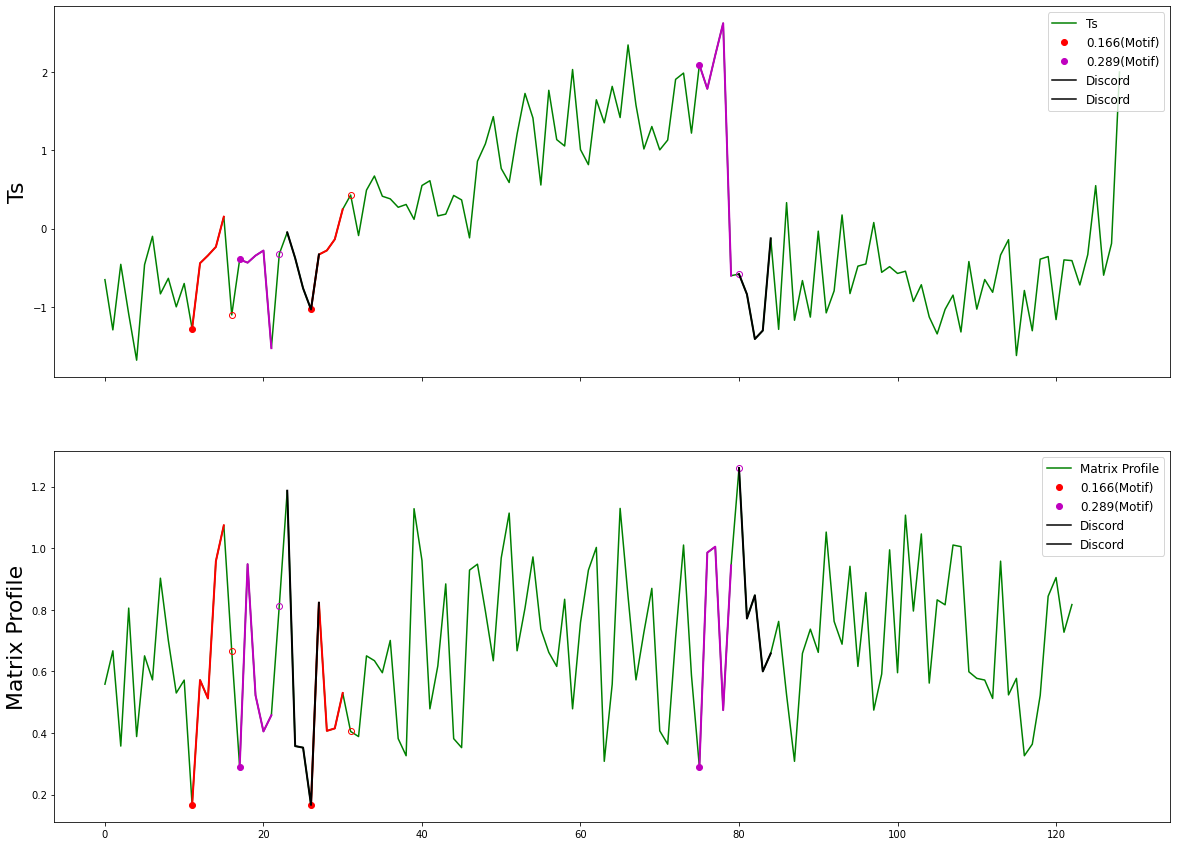

TS ID:11
TS CLASS:b'2'
Motifs starting position: [[31, 55], [7, 60]] Motifs values (min distances): [0.1616475877013791, 0.24119722242836672]
Discords starting position: [114  54]
Motifs[[31, 55], [7, 60]]
Motifs Dist[0.1616475877013791, 0.24119722242836672]
Discords[114  54]


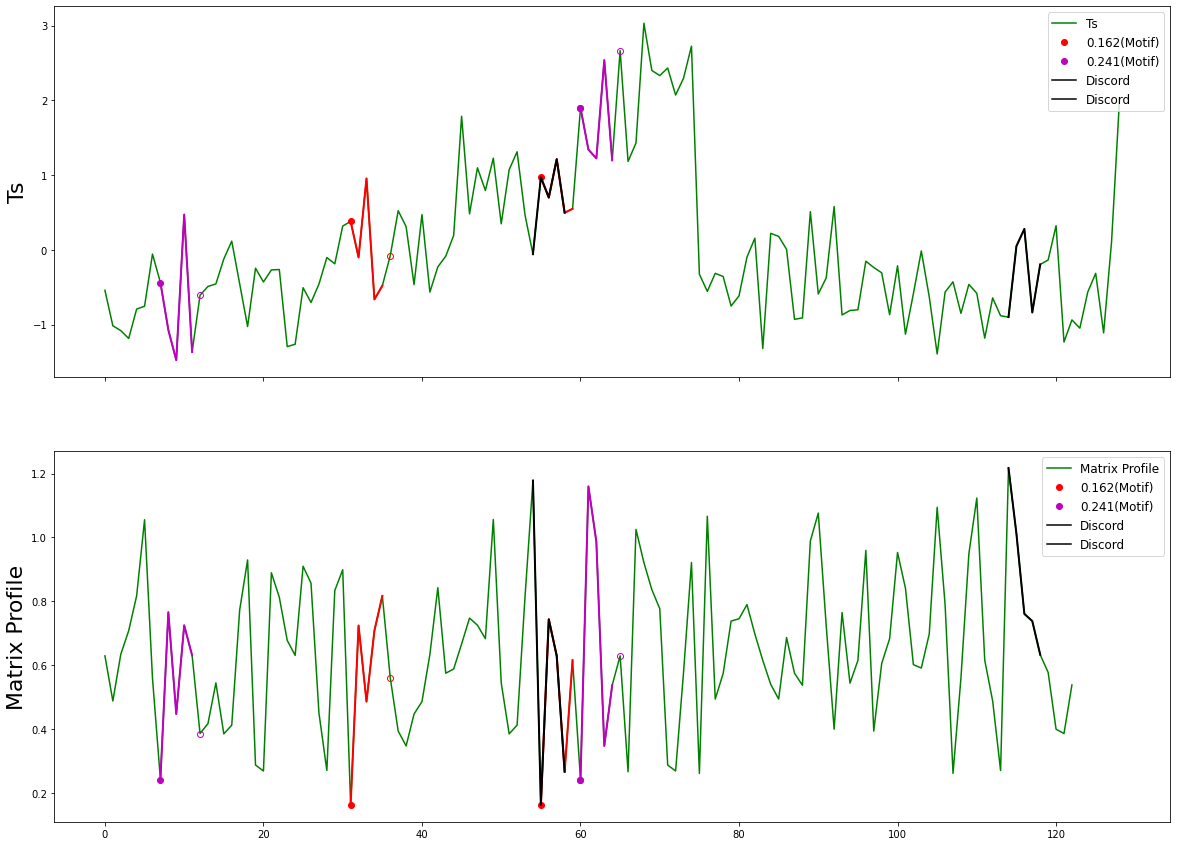

TS ID:12
TS CLASS:b'1'
Motifs starting position: [[53, 105]] Motifs values (min distances): [0.28755243572187394]
Discords starting position: [61 10]
Motifs[[53, 105]]
Motifs Dist[0.28755243572187394]
Discords[61 10]


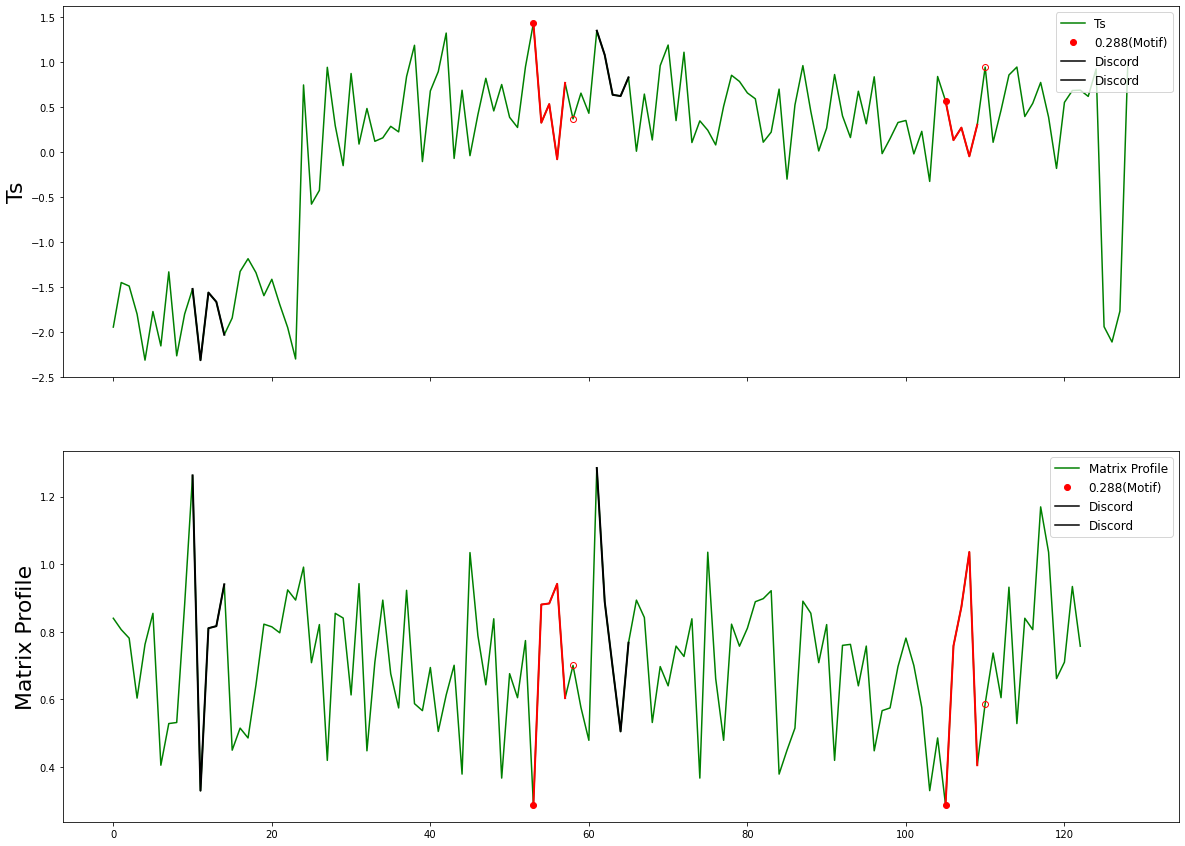

TS ID:13
TS CLASS:b'2'
Motifs starting position: [[79, 84], [6, 106]] Motifs values (min distances): [0.13665426519215504, 0.16173390223433784]
Discords starting position: [105  38]
Motifs[[79, 84], [6, 106]]
Motifs Dist[0.13665426519215504, 0.16173390223433784]
Discords[105  38]


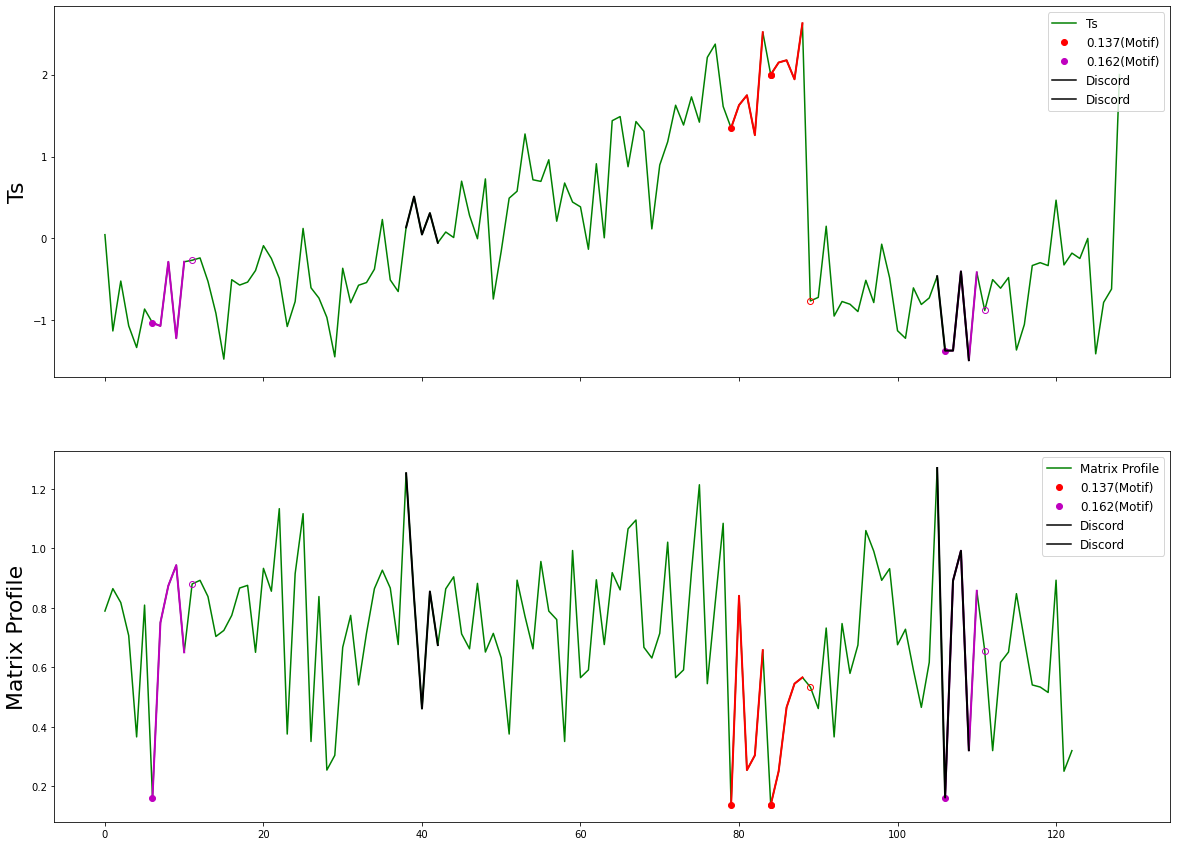

TS ID:14
TS CLASS:b'2'
Motifs starting position: [[59, 70]] Motifs values (min distances): [0.07560560950282277]
Discords starting position: [98  8]
Motifs[[59, 70]]
Motifs Dist[0.07560560950282277]
Discords[98  8]


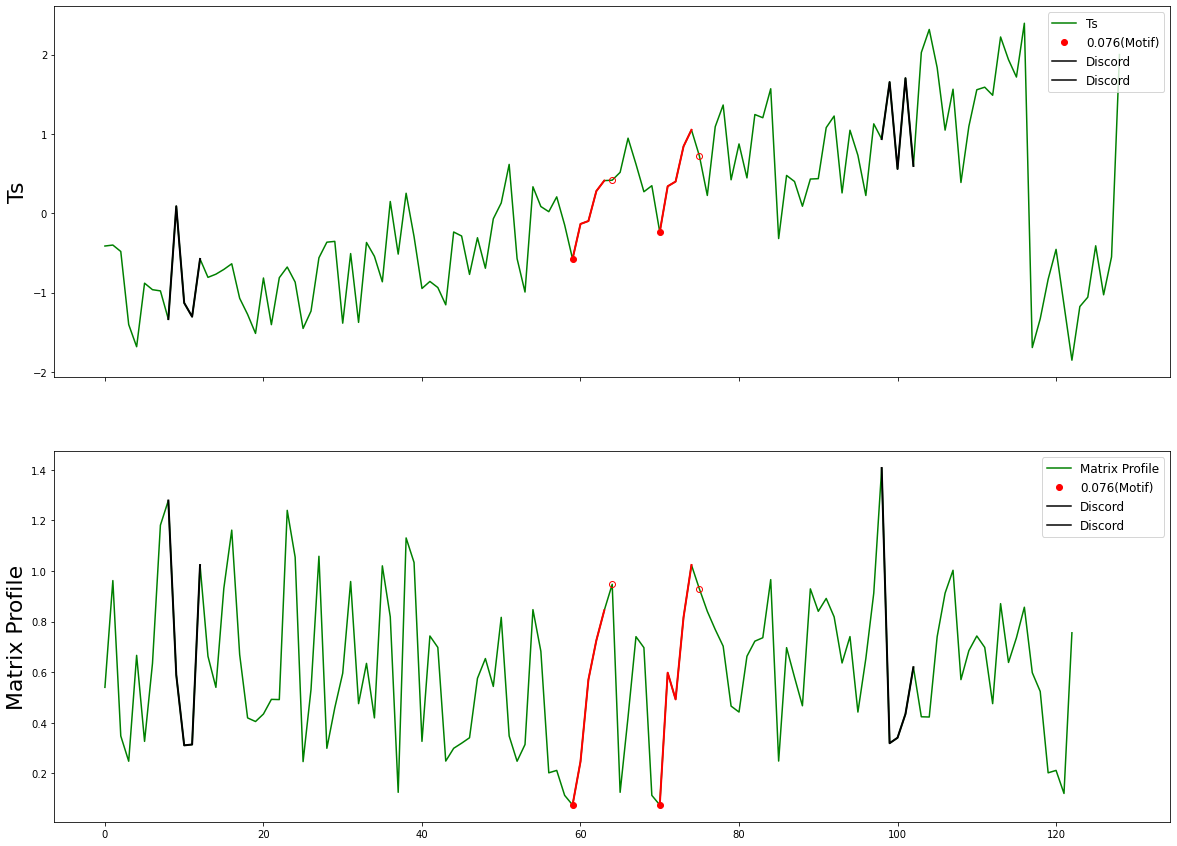

TS ID:15
TS CLASS:b'3'
Motifs starting position: [[2, 91], [45, 59]] Motifs values (min distances): [0.11358160507063154, 0.14589406519356724]
Discords starting position: [1 8]
Motifs[[2, 91], [45, 59]]
Motifs Dist[0.11358160507063154, 0.14589406519356724]
Discords[1 8]


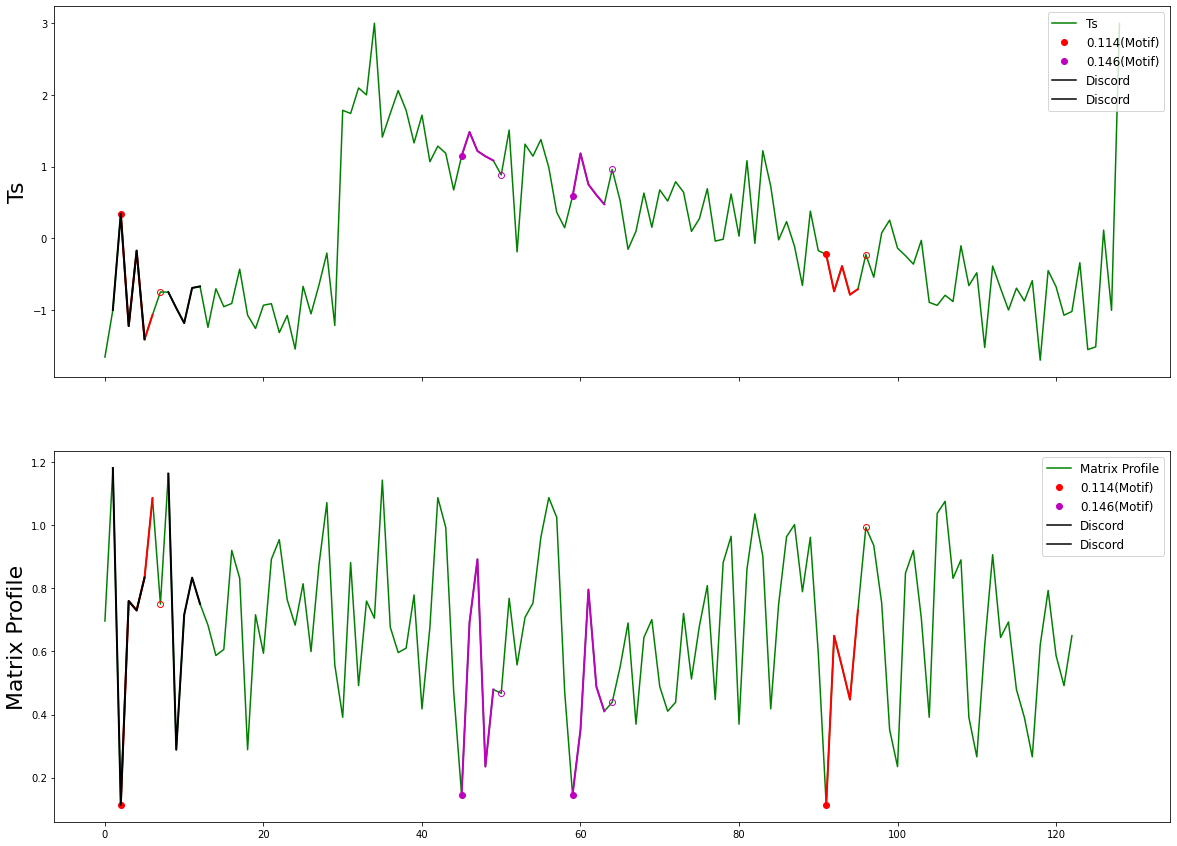

TS ID:16
TS CLASS:b'2'
Motifs starting position: [[28, 44, 86, 117], [3, 34]] Motifs values (min distances): [0.32674593502302507, 0.34386044548532413]
Discords starting position: [ 5 88]
Motifs[[28, 44, 86, 117], [3, 34]]
Motifs Dist[0.32674593502302507, 0.34386044548532413]
Discords[ 5 88]


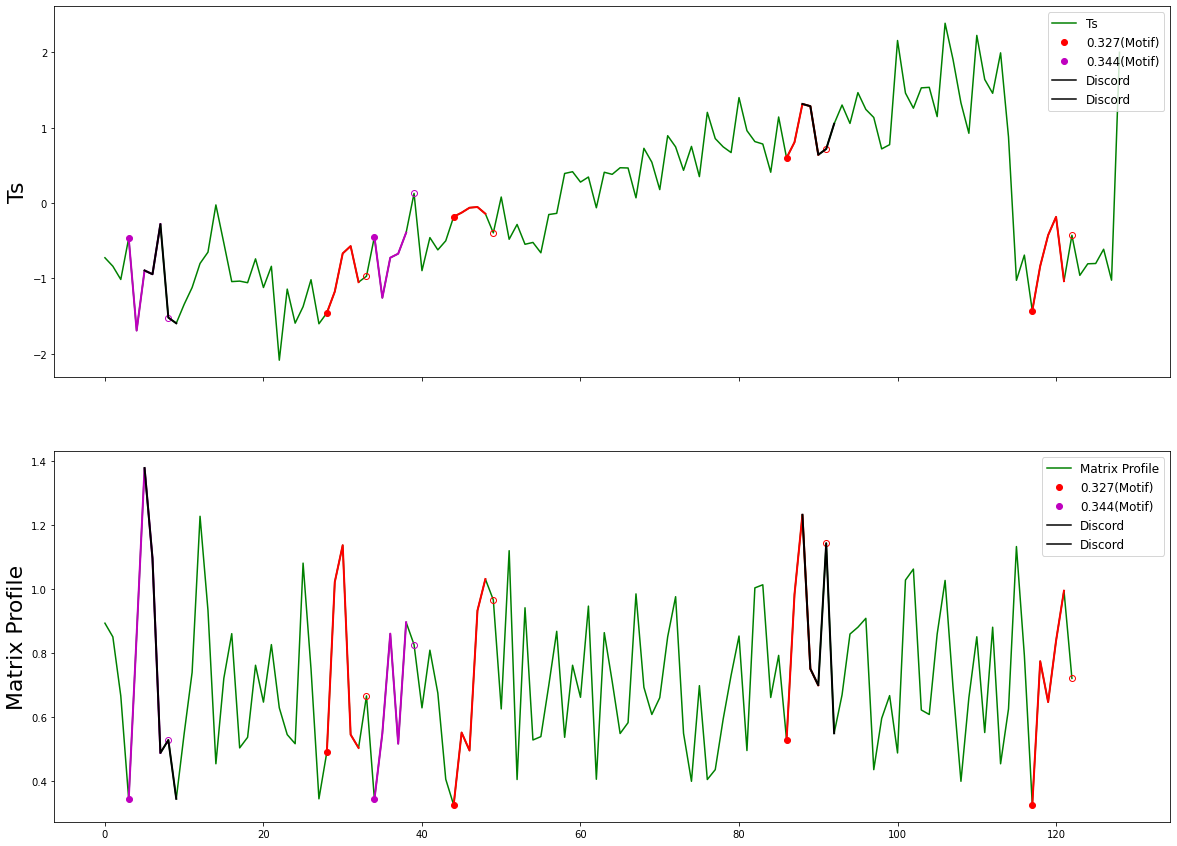

TS ID:17
TS CLASS:b'2'
Motifs starting position: [[14, 20], [35, 117]] Motifs values (min distances): [0.2765546116326067, 0.39936099607454156]
Discords starting position: [118  85]
Motifs[[14, 20], [35, 117]]
Motifs Dist[0.2765546116326067, 0.39936099607454156]
Discords[118  85]


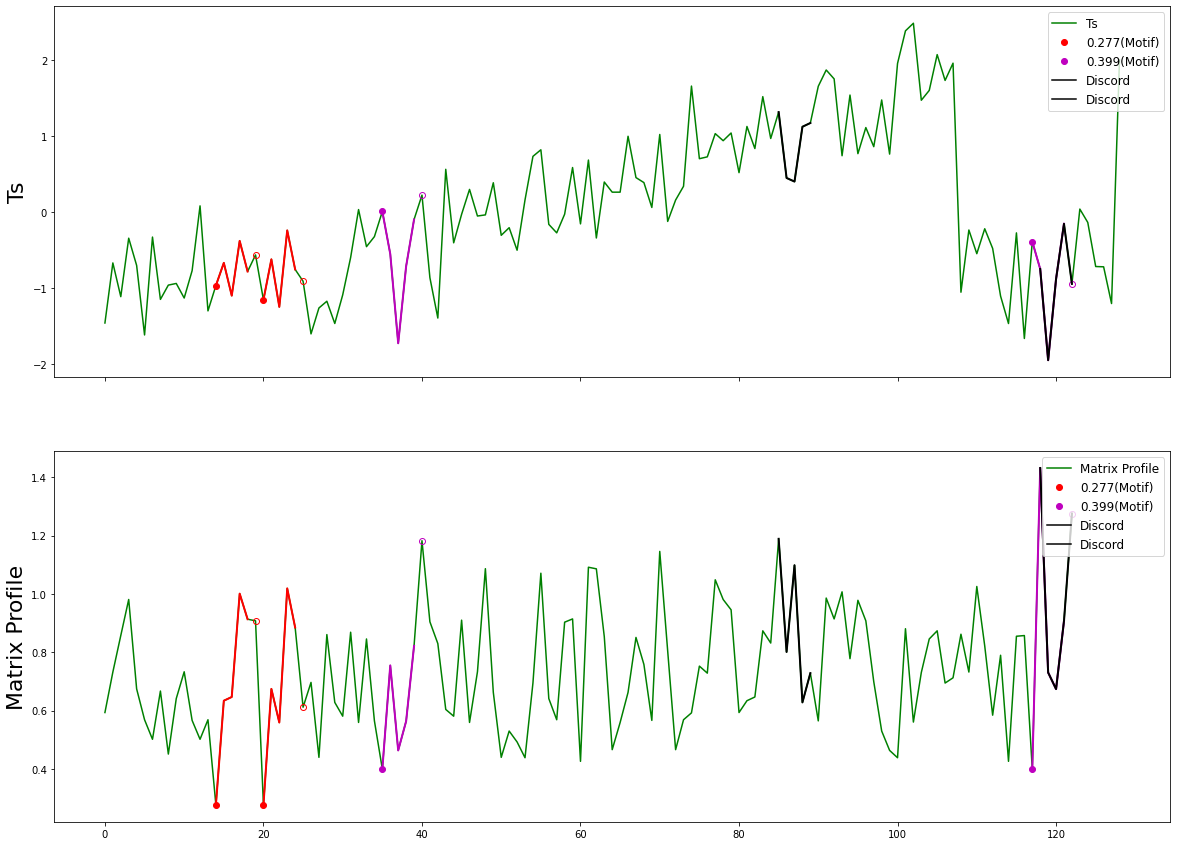

TS ID:18
TS CLASS:b'1'
Motifs starting position: [[13, 71], [3, 48]] Motifs values (min distances): [0.21064292584749847, 0.22837881052590026]
Discords starting position: [111   8]
Motifs[[13, 71], [3, 48]]
Motifs Dist[0.21064292584749847, 0.22837881052590026]
Discords[111   8]


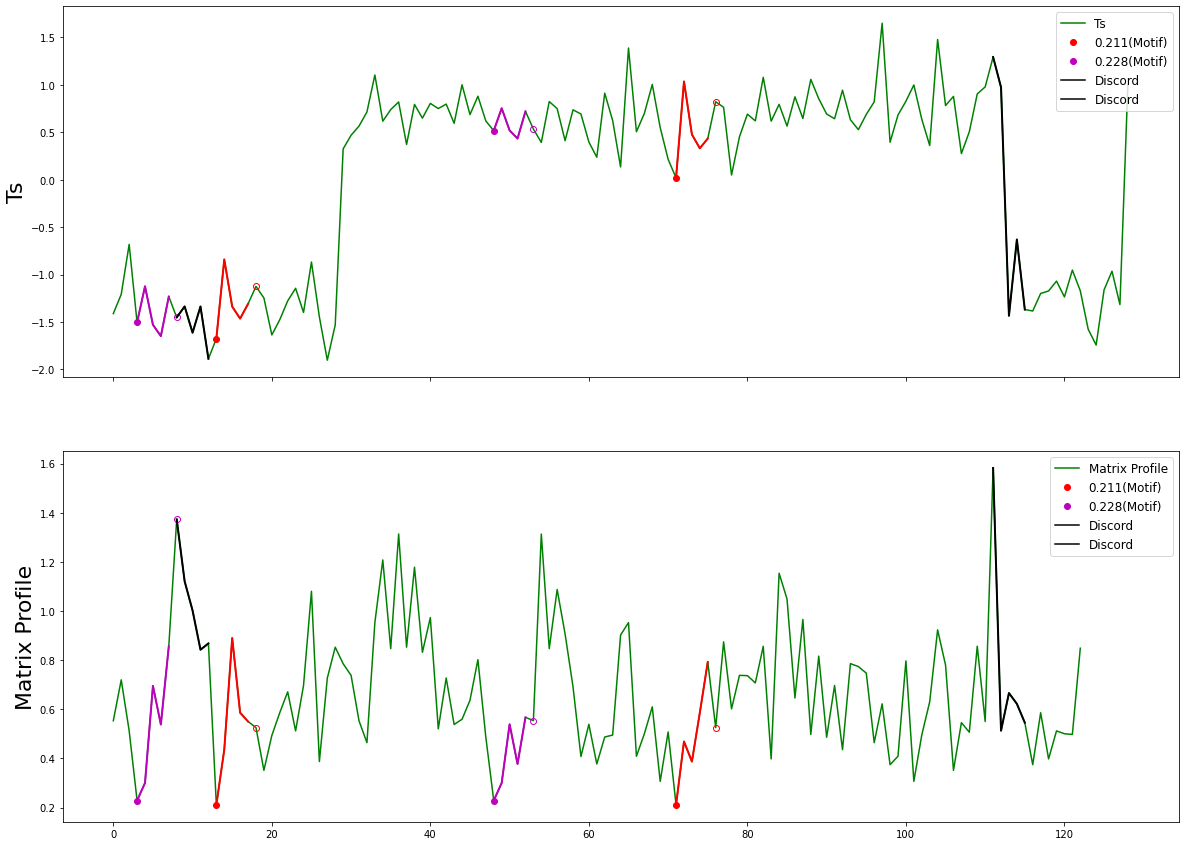

TS ID:19
TS CLASS:b'3'
Motifs starting position: [[19, 55], [6, 67]] Motifs values (min distances): [0.16896914871992136, 0.28024643509853664]
Discords starting position: [92 35]
Motifs[[19, 55], [6, 67]]
Motifs Dist[0.16896914871992136, 0.28024643509853664]
Discords[92 35]


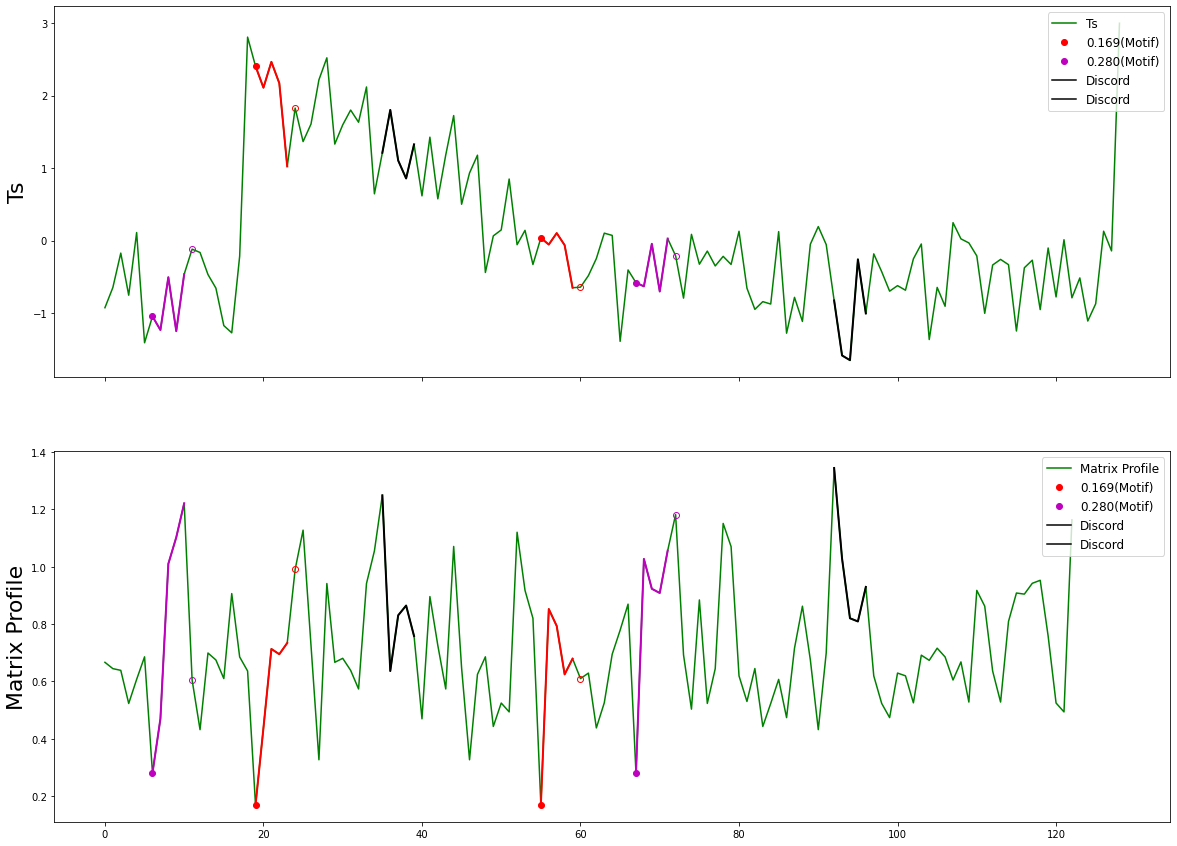

TS ID:20
TS CLASS:b'2'
Motifs starting position: [[19, 78], [39, 85]] Motifs values (min distances): [0.17914082234156212, 0.21507093773481542]
Discords starting position: [26 70]
Motifs[[19, 78], [39, 85]]
Motifs Dist[0.17914082234156212, 0.21507093773481542]
Discords[26 70]


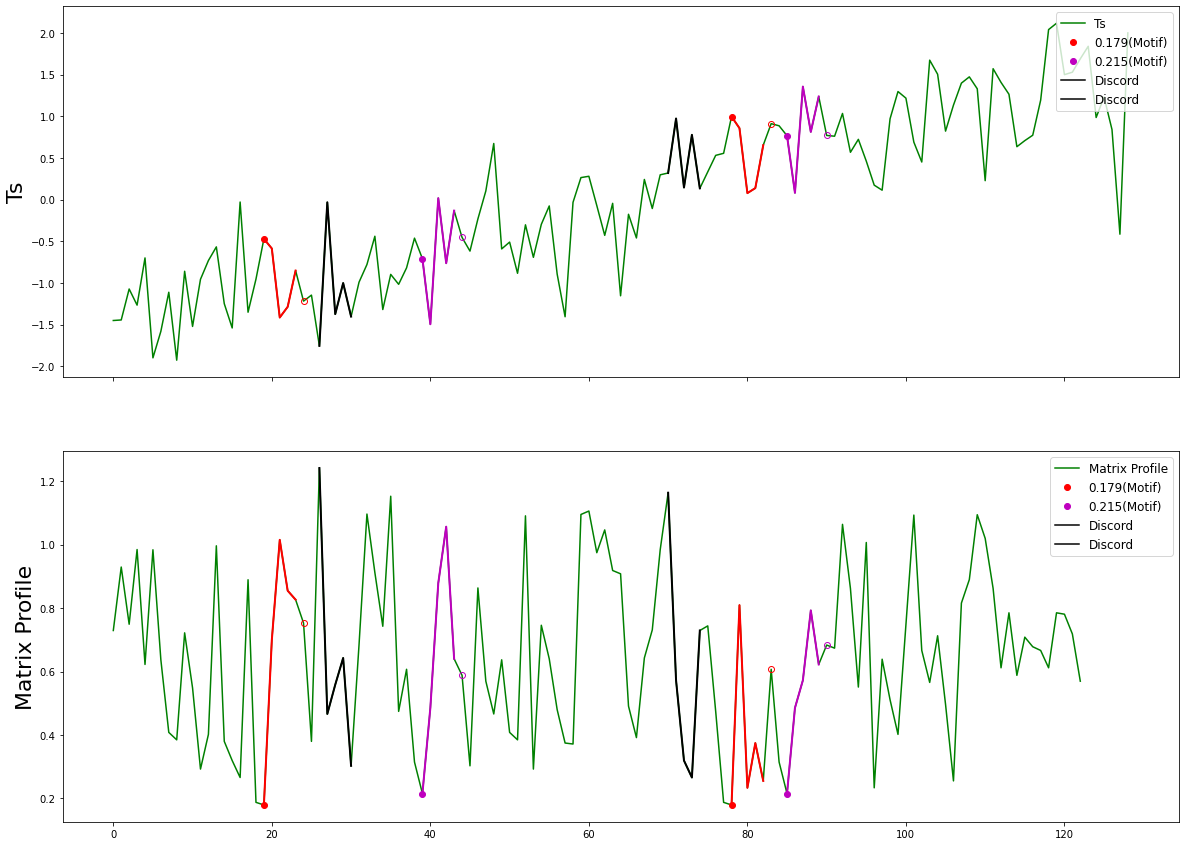

TS ID:21
TS CLASS:b'2'
Motifs starting position: [[26, 84]] Motifs values (min distances): [0.14444538033024096]
Discords starting position: [13 35]
Motifs[[26, 84]]
Motifs Dist[0.14444538033024096]
Discords[13 35]


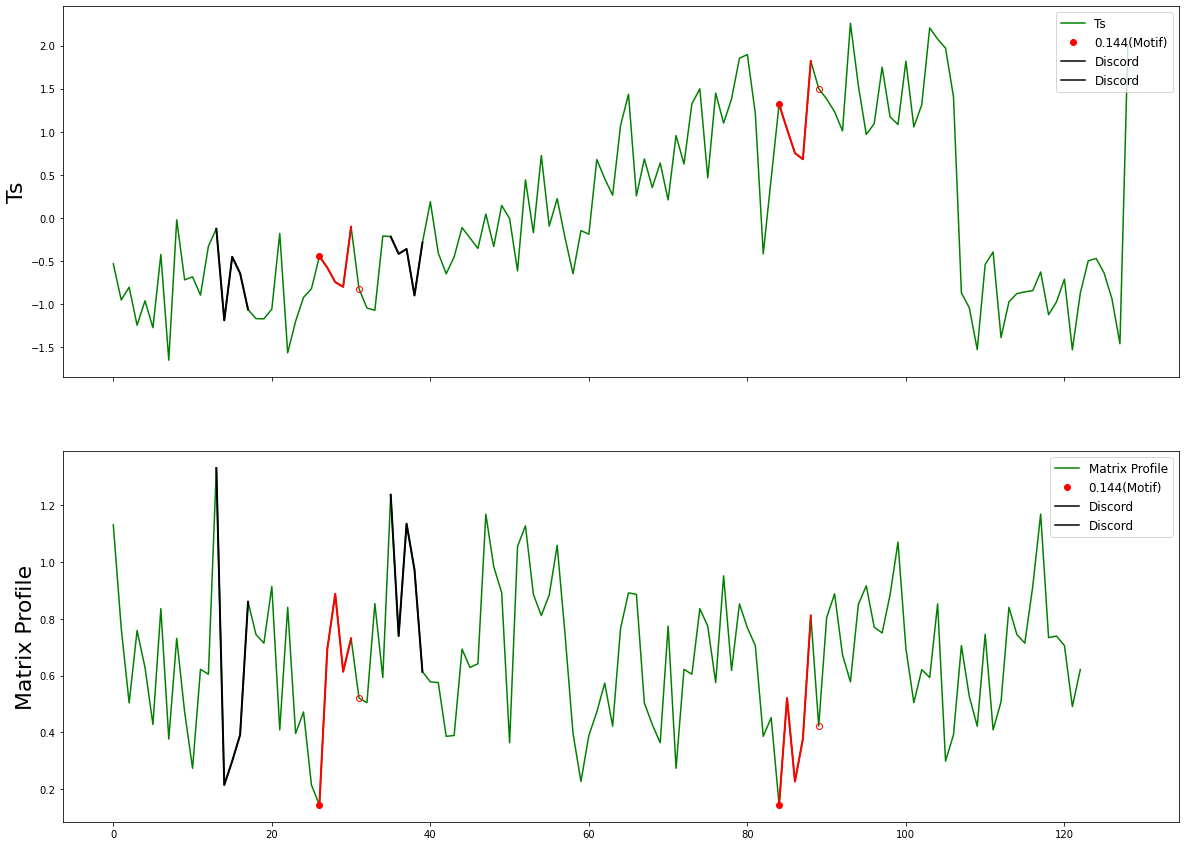

TS ID:22
TS CLASS:b'1'
Motifs starting position: [[18, 28], [22, 65]] Motifs values (min distances): [0.1998844437526097, 0.23567223220802405]
Discords starting position: [59 25]
Motifs[[18, 28], [22, 65]]
Motifs Dist[0.1998844437526097, 0.23567223220802405]
Discords[59 25]


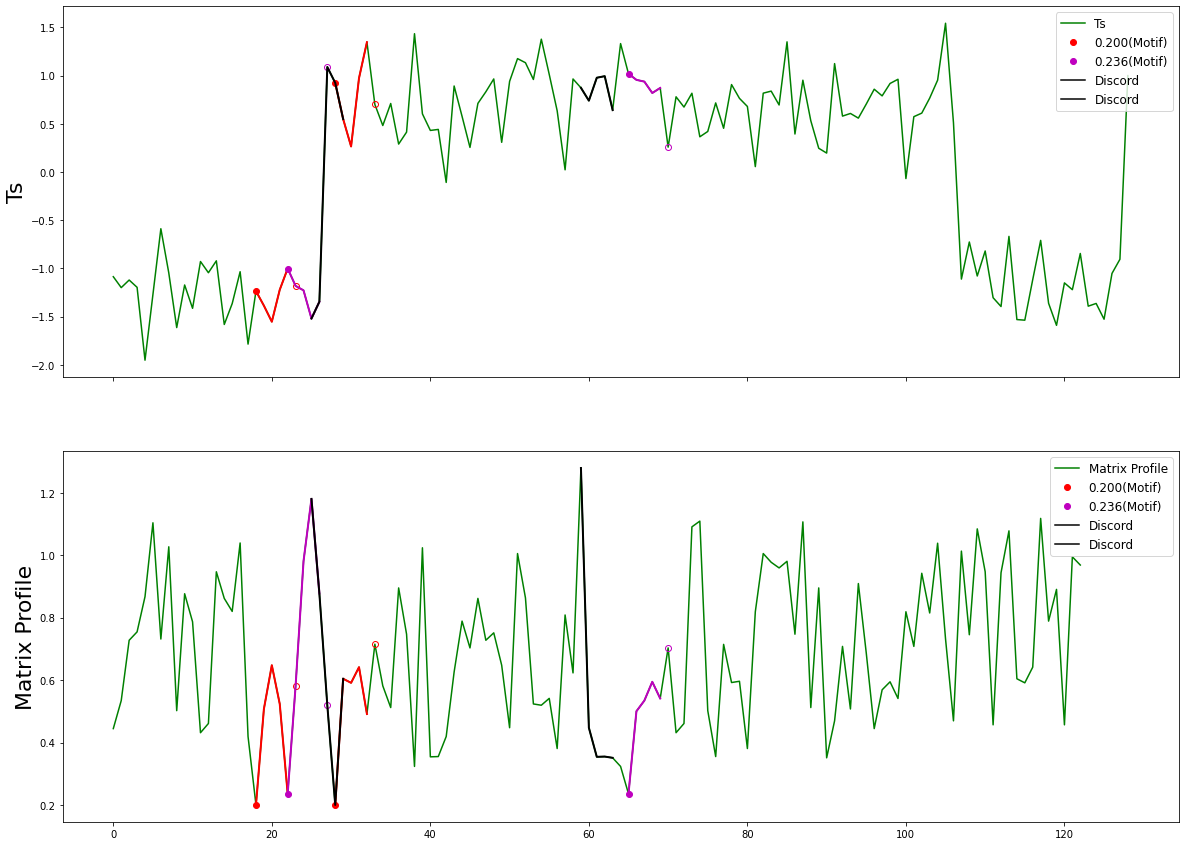

TS ID:23
TS CLASS:b'1'
Motifs starting position: [[27, 116], [42, 63]] Motifs values (min distances): [0.11451333821264008, 0.19450003031008645]
Discords starting position: [ 32 104]
Motifs[[27, 116], [42, 63]]
Motifs Dist[0.11451333821264008, 0.19450003031008645]
Discords[ 32 104]


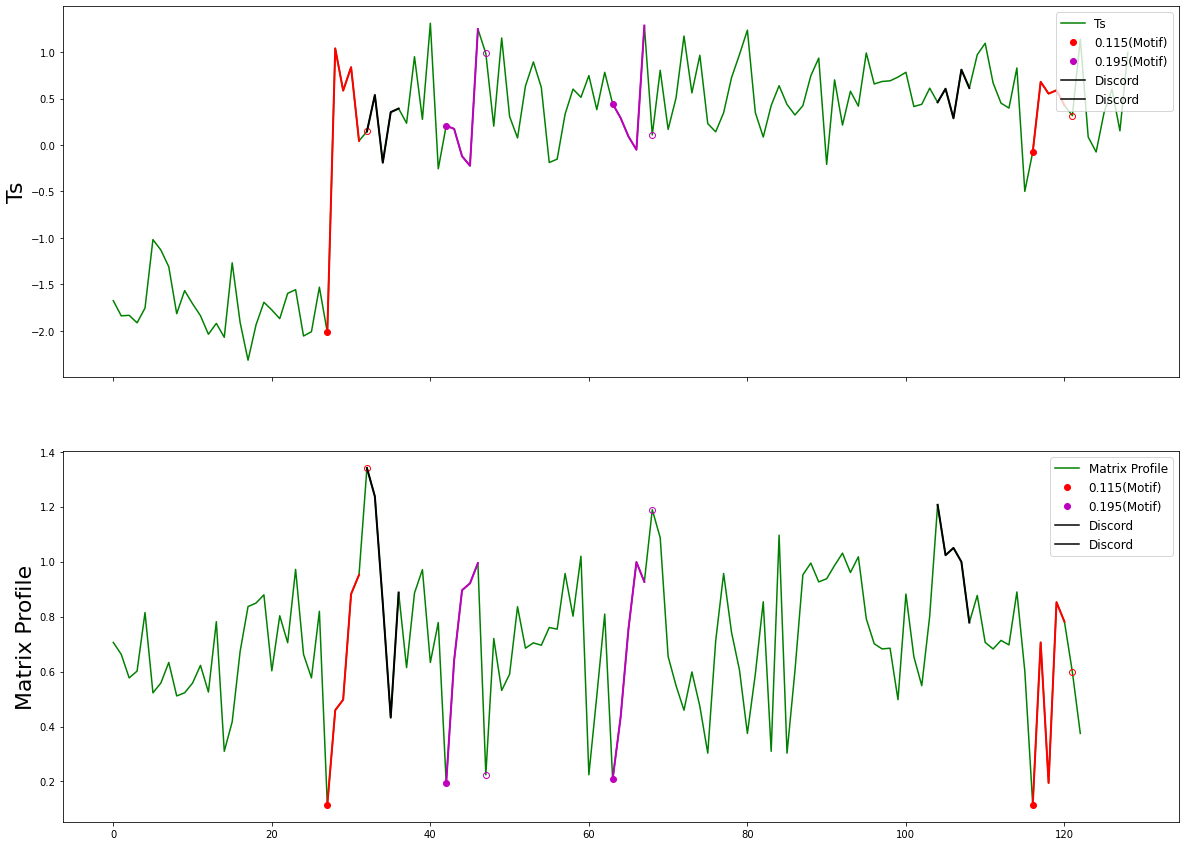

TS ID:24
TS CLASS:b'3'
Motifs starting position: [[8, 74, 87], [28, 65]] Motifs values (min distances): [0.27922080088198786, 0.31567923266073744]
Discords starting position: [ 4 95]
Motifs[[8, 74, 87], [28, 65]]
Motifs Dist[0.27922080088198786, 0.31567923266073744]
Discords[ 4 95]


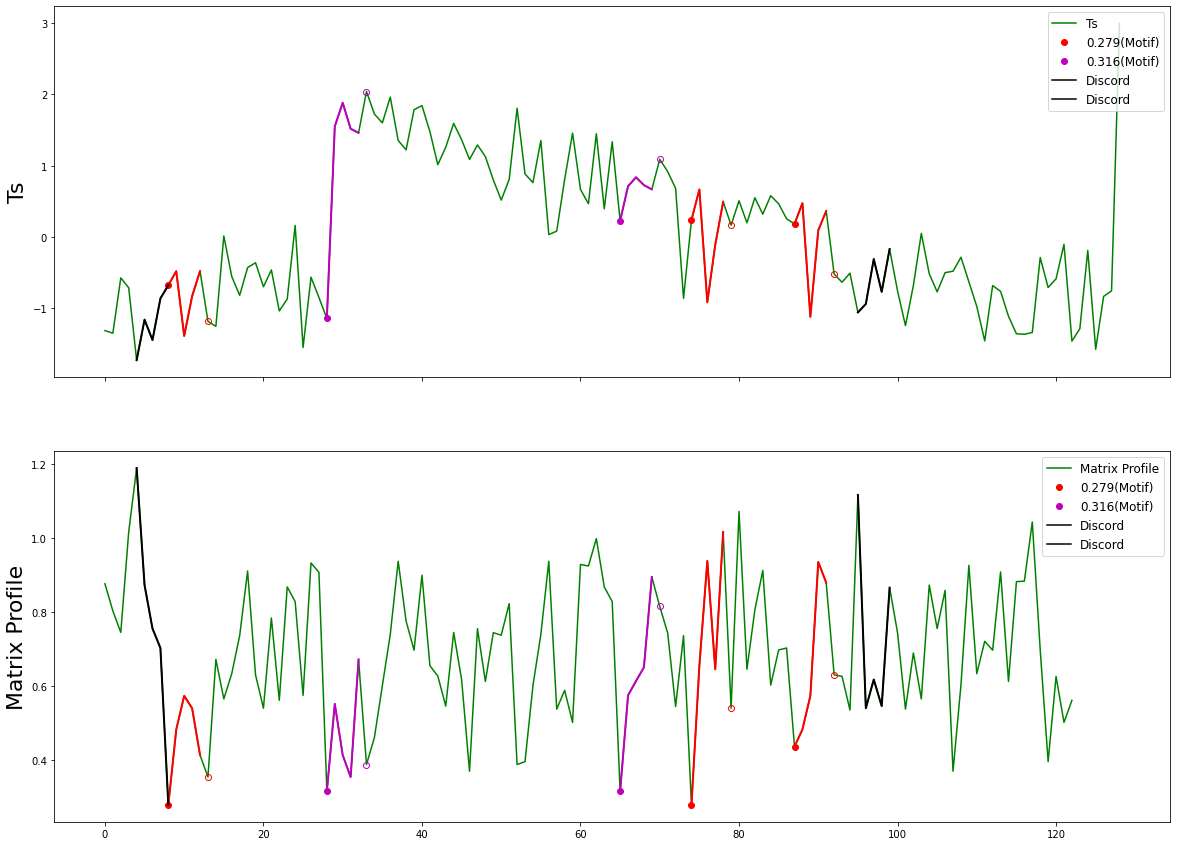

Motif/Discord estratti
            Motif    Discord
0     [9.0, 26.0]   [61, 27]
1   [105.0, 54.0]   [8, 119]
2    [17.0, 40.0]    [31, 1]
3    [48.0, 12.0]   [23, 86]
4          [27.0]   [38, 62]
5    [45.0, 13.0]  [119, 26]
6     [7.0, 37.0]   [98, 76]
7     [2.0, 24.0]    [36, 8]
8     [1.0, 29.0]   [23, 32]
9     [50.0, 0.0]   [38, 59]
10   [11.0, 17.0]   [80, 23]
11    [31.0, 7.0]  [114, 54]
12         [53.0]   [61, 10]
13    [79.0, 6.0]  [105, 38]
14         [59.0]    [98, 8]
15    [2.0, 45.0]     [1, 8]
16    [28.0, 3.0]    [5, 88]
17   [14.0, 35.0]  [118, 85]
18    [13.0, 3.0]   [111, 8]
19    [19.0, 6.0]   [92, 35]
20   [19.0, 39.0]   [26, 70]
21         [26.0]   [13, 35]
22   [18.0, 22.0]   [59, 25]
23   [27.0, 42.0]  [32, 104]
24    [8.0, 28.0]    [4, 95]


In [12]:
window_size=5
diz={'Motif':[],'Discord':[]}
PreProcessedTs = pd.DataFrame(diz)

for i in range(25):
    Ts = np.array(df.iloc[i].values)
    print('TS ID:' + str(i))
    print('TS CLASS:' + str(Ts[128]))
    mp,mot,motif_dist,dis = retrieve_all(Ts)
   # print('MP'+str(mp))
    print("Motifs"+str(mot))
    print("Motifs Dist"+str(motif_dist))
    print("Discords"+str(dis))
    plot_all(Ts,mp,mot,motif_dist,dis,window_size)
    PreProcessedTs.loc[i]=mot,dis
        
PreProcessedTs=candidateFilter(PreProcessedTs)
print('Motif/Discord estratti')
print(PreProcessedTs)